## Figure 3: Alternative Cancellation Proposals

from "Student Debt Cancellation *Is* Progressive", a Roosevelt Institute research paper 

by Charlie Eaton, Adam Goldstein, Laura Hamilton, and Frederick Wherry

In [1]:
*ssc install dubois
*ssc install combomarginsplot

In [2]:
graph set svg fontface Tahoma
graph set eps fontface Tahoma
graph set ps fontface Tahoma
set scheme dubois

In [3]:
use data/scfstudentdebt2019, clear

In [4]:
qui {

gen selfparent=self_fedloans + parent_fedloans
    
foreach amt in 10000 50000 75000 {
gen selfcancel`amt'=`amt'
    replace selfcancel`amt'=selfparent if selfparent<`amt'

gen spousecancel`amt'=`amt'
replace spousecancel`amt'=spouse_fedloans if spouse_fedloans<`amt'
  
egen householdcancel`amt'=rowtotal(selfcancel`amt' spousecancel`amt')

gen percapcancel`amt'=householdcancel`amt'
    replace percapcancel`amt'=householdcancel`amt' / 2  if married==1 & householdcancel`amt'!=0
    }
}

In [5]:
foreach amt in 10000 50000 75000 {

qui regress percapcancel`amt' i.assetcat [pw=wgt] 
qui margins i.assetcat , saving(data/percapcancel`amt', replace)

}

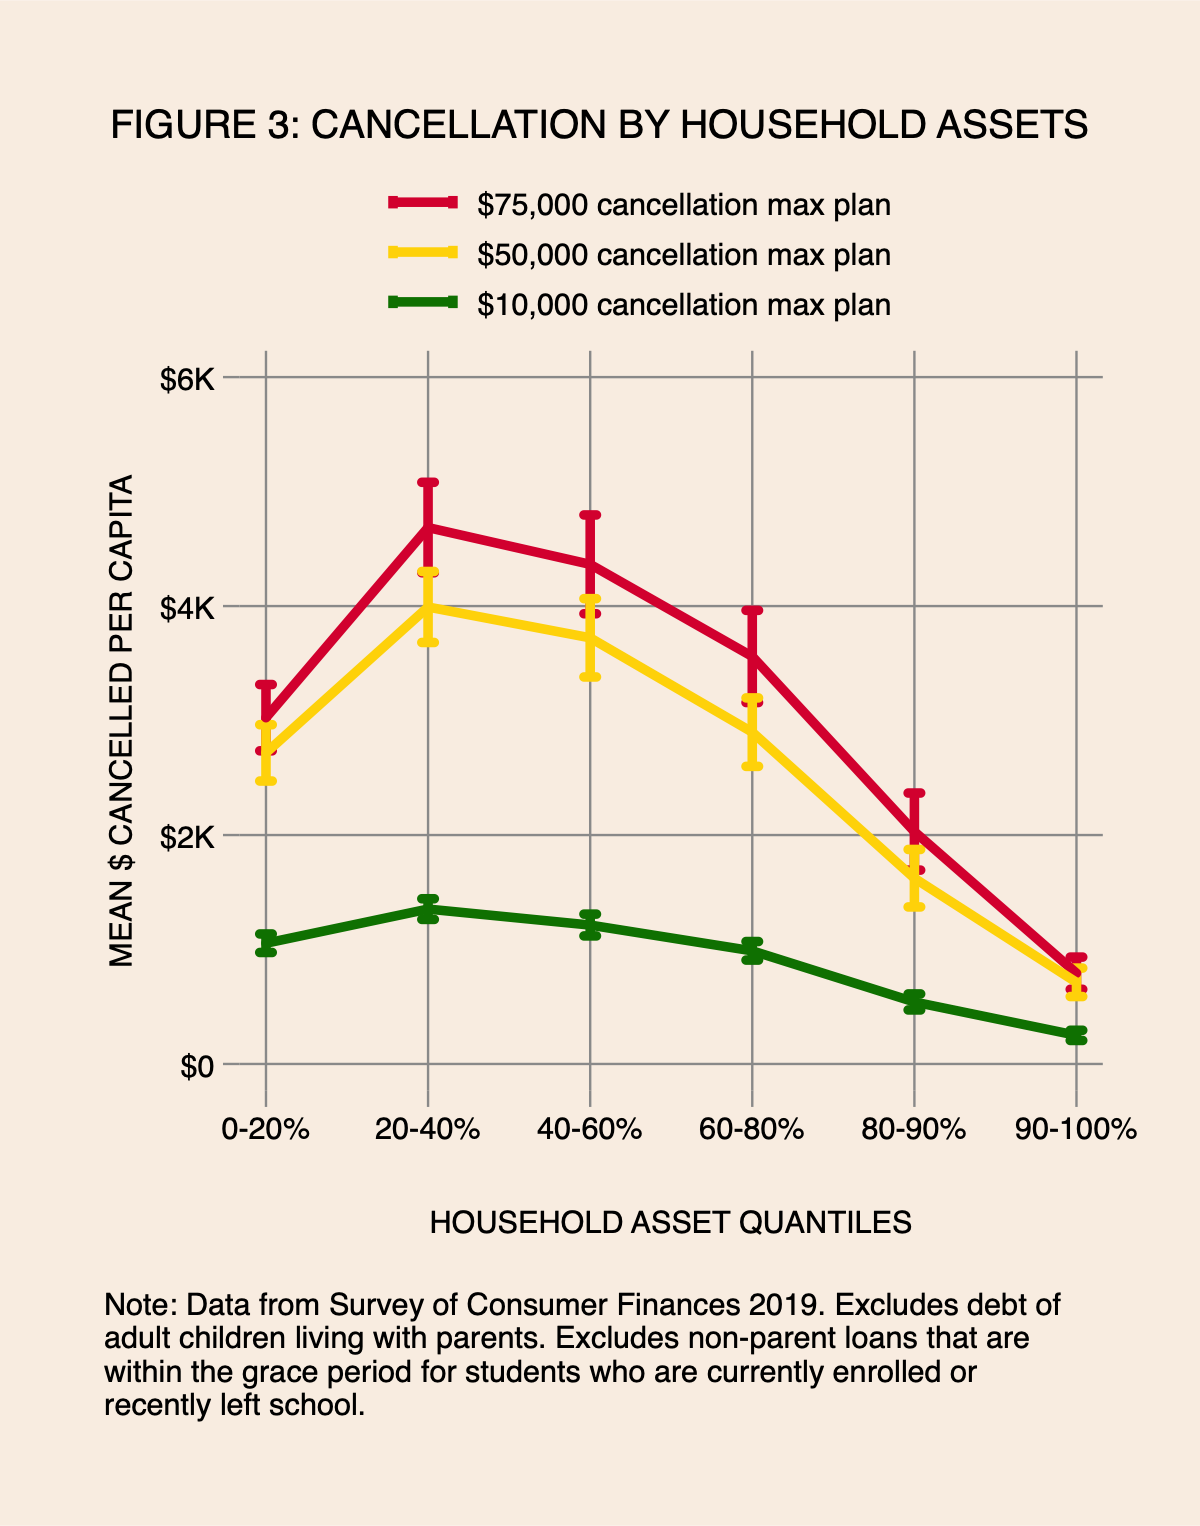

In [6]:
qui combomarginsplot12 data/percapcancel75000 data/percapcancel50000 data/percapcancel10000 ///
, ytitle(MEAN $ CANCELLED PER CAPITA) ///
title("FIGURE 3: CANCELLATION BY HOUSEHOLD ASSETS", size(medsmall)) ///
legend(position(12) order(1 "$75,000 cancellation max plan" 2 "$50,000 cancellation max plan" ///
3 "$10,000 cancellation max plan")) ///
note(" " "Note: Data from Survey of Consumer Finances 2019. Excludes debt of" ///
        "adult children living with parents. Excludes non-parent loans that are" ///
        "within the grace period for students who are currently enrolled or" ///
        "recently left school.", size(small) xoffset(0)) graphregion(margin(large)) ///
xscale(titlegap(large)) ylabel(0 "$0" 2000 "$2K" 4000 "$4K" 6000 "$6K") ///
xtitle(HOUSEHOLD ASSET QUANTILES) scheme(dubois)

graph display
qui graph export figures/f3_cancellationbyassets.pdf, replace

In [7]:
qui gen age2=age*age

In [9]:
foreach amt in 10000 50000 75000 {

qui regress percapcancel`amt' i.assetcat age age2 [pw=wgt] 
qui margins i.assetcat , saving(data/percapcancel`amt', replace)

}

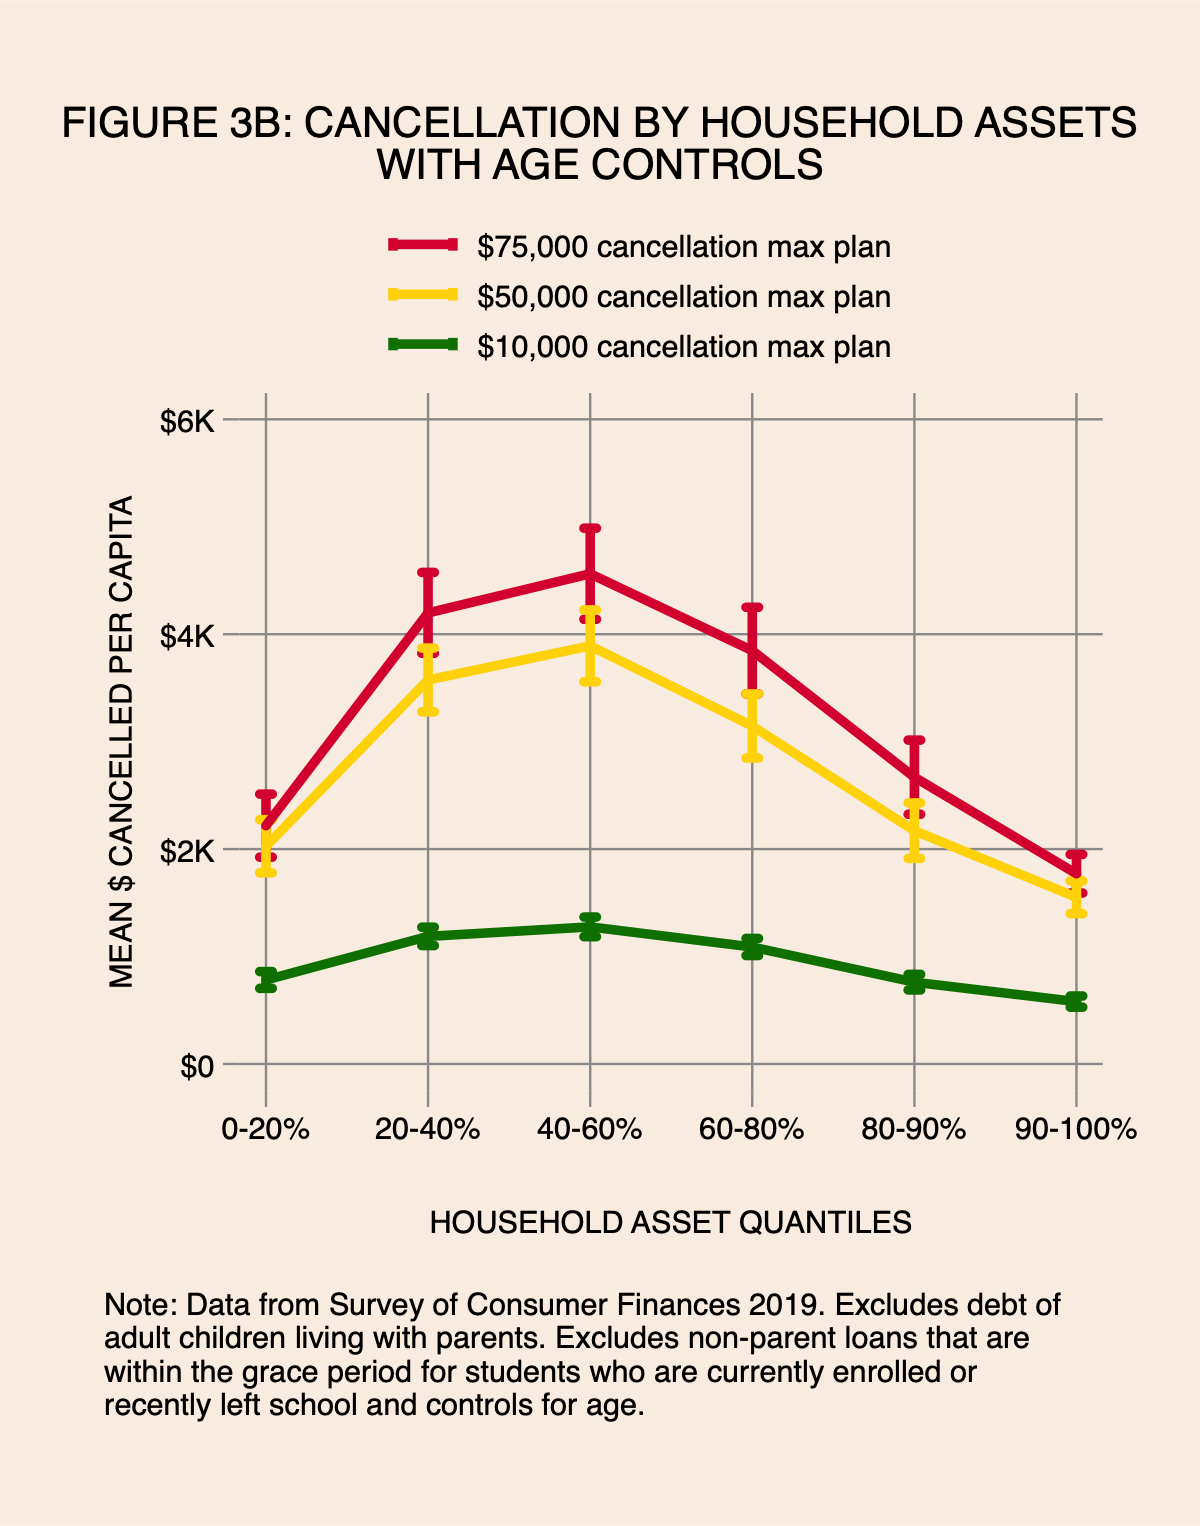

In [11]:
qui combomarginsplot12 data/percapcancel75000 data/percapcancel50000 data/percapcancel10000 ///
, ytitle(MEAN $ CANCELLED PER CAPITA) ///
title("FIGURE 3B: CANCELLATION BY HOUSEHOLD ASSETS" "WITH AGE CONTROLS", size(3.5)) ///
legend(position(12) order(1 "$75,000 cancellation max plan" 2 "$50,000 cancellation max plan" ///
3 "$10,000 cancellation max plan")) ///
note(" " "Note: Data from Survey of Consumer Finances 2019. Excludes debt of" ///
        "adult children living with parents. Excludes non-parent loans that are" ///
        "within the grace period for students who are currently enrolled or" ///
        "recently left school and controls for age.", size(small) xoffset(0)) graphregion(margin(large)) ///
        xscale(titlegap(large)) ylabel(0 "$0" 2000 "$2K" 4000 "$4K" 6000 "$6K") ///
        xtitle(HOUSEHOLD ASSET QUANTILES) scheme(dubois)

graph display